In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import numpy as np
import os
import h5py
from src.helper.paths import BASELINES_PATH
from partglot.utils.simple_utils import unpickle_data
from src.helper.visualization import visualize_pointcloud, visualize_pointclouds_parts_partglot, plot_pointclouds

In [3]:
data_dir = BASELINES_PATH / 'PartGlot/data'

h5_data = h5py.File(data_dir / "shapenet_partseg_chair_bsp.h5")
segs_data = h5_data["data"][:].astype(np.float32)
segs_mask = h5_data["mask"][:].astype(np.float32)

groundtruths, signed_distances = unpickle_data(data_dir / "shapenet_partseg_chair_label_and_sd.pkl")

In [4]:
f"{segs_data.shape[0]} samples"

'3746 samples'

In [5]:
print("i={i}, segs_data[i].shape, segs_mask[i].shape, groundtruths[i].shape, np.unique(groundtruths[0]), signed_distances[i].shape, segs_mask[i].sum()")
for i in range(10):
    print(f"i={i}", segs_data[i].shape, segs_mask[i].shape, groundtruths[i].shape, np.unique(groundtruths[0]), signed_distances[i].shape, segs_mask[i].sum())

i={i}, segs_data[i].shape, segs_mask[i].shape, groundtruths[i].shape, np.unique(groundtruths[0]), signed_distances[i].shape, segs_mask[i].sum()
i=0 (50, 512, 3) (50,) (2691,) [0. 1. 2.] (2691, 25) 25.0
i=1 (50, 512, 3) (50,) (2755,) [0. 1. 2.] (2755, 16) 16.0
i=2 (50, 512, 3) (50,) (2645,) [0. 1. 2.] (2645, 15) 15.0
i=3 (50, 512, 3) (50,) (2543,) [0. 1. 2.] (2543, 24) 24.0
i=4 (50, 512, 3) (50,) (2733,) [0. 1. 2.] (2733, 20) 20.0
i=5 (50, 512, 3) (50,) (2755,) [0. 1. 2.] (2755, 27) 27.0
i=6 (50, 512, 3) (50,) (2713,) [0. 1. 2.] (2713, 11) 11.0
i=7 (50, 512, 3) (50,) (2690,) [0. 1. 2.] (2690, 14) 14.0
i=8 (50, 512, 3) (50,) (2776,) [0. 1. 2.] (2776, 33) 33.0
i=9 (50, 512, 3) (50,) (2745,) [0. 1. 2.] (2745, 20) 20.0


In [18]:
segs_mask[i]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [6]:
groundtruths[0], signed_distances[0]

(array([2., 2., 1., ..., 1., 0., 2.]),
 array([[-0.35771083, -0.43322745, -0.01597902, ..., -0.4374695 ,
         -0.33557525, -0.01126467],
        [-0.36145894, -0.35338036, -0.13286862, ..., -0.4243072 ,
         -0.31539087,  0.00559162],
        [-0.07137045, -0.25126013, -0.35033128, ..., -0.13167291,
         -0.06351087, -0.35956461],
        ...,
        [-0.15504879, -0.04712584, -0.35585565, ..., -0.1324528 ,
         -0.00201913, -0.32383671],
        [-0.19709464, -0.01711427, -0.44673964, ..., -0.09241462,
         -0.0885952 , -0.40675186],
        [-0.37528644, -0.43743455,  0.00807282, ..., -0.45631713,
         -0.29880813, -0.17426545]]))

In [7]:
visualize_pointclouds_parts_partglot(point_clouds=segs_data[0])

Visualization rendering started...


Output()

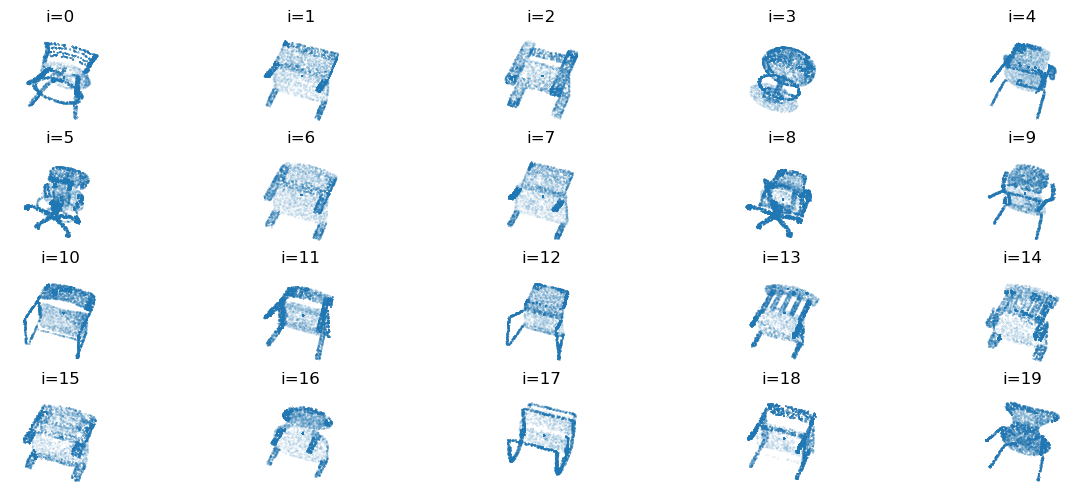

In [28]:
# inspect multiple point clouds at the same time
s = 0
from src.partglot.utils.processing import vstack2dim
stacked_pcs = [vstack2dim(pc) for pc in segs_data[s:s+20]]
plot_pointclouds(stacked_pcs, start_idx=s)

In [15]:
i = s+1
visualize_pointclouds_parts_partglot(point_clouds=[vstack2dim(segs_data[i])])

Visualization rendering started...


Output()

In [16]:
i

21

In [74]:
var = segs_mask
shape = var.shape
uniques = np.unique(var, return_counts=True)
distr = np.round(var.mean(axis=0) * 100)
rowwise_cnt = np.unique(var.sum(axis=1), return_counts=True)

print(f"var_name: segs_mask\n")
print(f"shape: {shape}\n")
print(f"var:\n{var}\n")
print(f"uniques:\n{uniques}\n")
print(f"elementwise distr:\n{distr}\n")
print(f"rowwise_cnt:\n{rowwise_cnt}\n")

var_name: segs_mask

shape: (3746, 50)

var:
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]

uniques:
(array([0., 1.], dtype=float32), array([118182,  69118]))

elementwise distr:
[100. 100. 100. 100. 100. 100. 100.  99.  98.  96.  93.  89.  84.  79.
  73.  65.  58.  51.  44.  39.  32.  28.  23.  20.  16.  13.  11.   9.
   7.   6.   4.   3.   2.   1.   1.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]

rowwise_cnt:
(array([ 3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
       17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38.], dtype=float32), array([  1,   1,   2,  18,  39,  72, 129, 150, 185, 187, 242, 291, 272,
       249, 242, 216, 241, 164, 166, 143, 129, 110,  86,  72,  66,  66,
        47,  45,  49,  28,  16,  10,   6,   4,   2]))

